# Imputacion por Llenado

## Configuracion Entorno

### Librerias

In [32]:
import janitor  # limpiar datos
import matplotlib.pyplot as plt # visualizacion de datos
import missingno    # exploracion de valores faltantes
import nhanes.load  # libreria con los datos a analizar
import numpy as np  # calculos numericos
import pandas as pd # trabajar con dataframe
import scipy.stats  # trabjar con estadisticos
import seaborn as sns   #   visualizacion estadistica

### Configuracion Graficas

In [33]:
%matplotlib inline

# tamaño de los graficos
sns.set(
    rc={
        'figure.figsize':(8, 6)
    }
)

# estilo de los graficos
sns.set_style('whitegrid')

### Cargar funciones personalizadas

In [34]:
%run '../utils2.ipynb'

## Cargar Datos

In [35]:
%run descarga_carga_datos.ipynb

12.25 %


## Cargar Datos Tratados

In [36]:
%run tratamiento_v_categoricas.ipynb

12.25 %


## Imputacion hacia adelante

### Variables Numericas

In [37]:
# variables sugar_gm, minutes_sedentary (numericas)

(
    nhanes_df
    .select_columns('sugar_gm', 'minutes_sedentary')
    .fillna(method='ffill')
)

,sugar_gm,minutes_sedentary
SEQN,,
93705.0,43.04,300.0
93706.0,43.04,240.0
93709.0,43.04,600.0
93711.0,163.76,420.0
93712.0,207.67,120.0
...,...,...
102948.0,58.87,120.0
102949.0,58.87,60.0
102953.0,58.87,360.0


In [38]:
# promedio de la variable sugar_gm

(
    nhanes_df
    .select_columns("sugar_gm", "minutes_sedentary")
    .missing.bind_shadow_matrix2(True, False, suffix = "_imp")
    .assign(
        sugar_gm = lambda df: df.sugar_gm.fillna(method='ffill'),
        minutes_sedentary = lambda df: df.minutes_sedentary.fillna(method='ffill')
    )
    .sugar_gm
    .mean()
)

94.21451892465537

El promedio de sugar_gm es diferente de la obtenida en la Imputacion de un unico valor (95.01)

In [39]:
# promedio de la variable minutes_sedentary

(
    nhanes_df
    .select_columns("sugar_gm", "minutes_sedentary")
    .missing.bind_shadow_matrix2(True, False, suffix = "_imp")
    .assign(
        sugar_gm = lambda df: df.sugar_gm.fillna(method='ffill'),
        minutes_sedentary = lambda df: df.minutes_sedentary.fillna(method='ffill')
    )
    .minutes_sedentary
    .mean()
)

391.31093031482135

### Visualizacion mediante un Scatterplot

Llenado hacia adelante


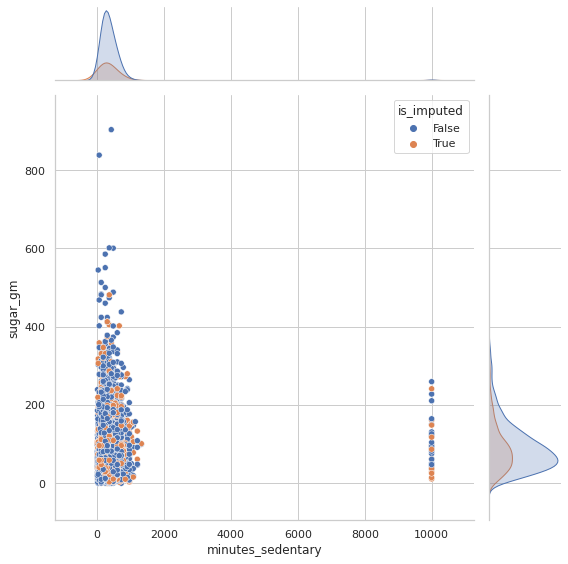

In [40]:
print('Llenado hacia adelante')
(
    nhanes_df
    .select_columns("sugar_gm", "minutes_sedentary")
    .missing.bind_shadow_matrix2(True, False, suffix = "_imp")
    .assign(
        sugar_gm = lambda df: df.sugar_gm.fillna(method='ffill'),
        minutes_sedentary = lambda df: df.minutes_sedentary.fillna(method='ffill')
    )
    .missing.scatter_imputation_plot(
    y="sugar_gm", 
    x="minutes_sedentary",
    show_marginal = True,   # muestra la distribucion a los costado
    height = 8             # tamano del grafico
    )
);

In [54]:
print('''La visualizacion mediante un scatterplot solo funciona para variables numericas. 
En este caso, vemos los datos imputados mucho mejor distribuidos. 
Las distribuciones de ambos valores, tanto los reales como los imputados, son muy similares 
lo que indica que la imputacion es buena.''')

La visualizacion mediante un scatterplot solo funciona para variables numericas. 
En este caso, vemos los datos imputados mucho mejor distribuidos. 
Las distribuciones de ambos valores, tanto los reales como los imputados, son muy similares 
lo que indica que la imputacion es buena.


### Variables numericas - categoricas

In [41]:
# variables vigorous_work, sugar_gm

(
    nhanes_transformed_df
    .select_columns('vigorous_work', 'sugar_gm')
    .fillna(method='ffill')
)

,vigorous_work,sugar_gm
SEQN,,
93705.0,0.0,43.04
93706.0,0.0,43.04
93709.0,0.0,43.04
93711.0,0.0,163.76
93712.0,1.0,207.67
...,...,...
102948.0,0.0,58.87
102949.0,1.0,58.87
102953.0,1.0,58.87


### Visualizacion mediante un scatterplot

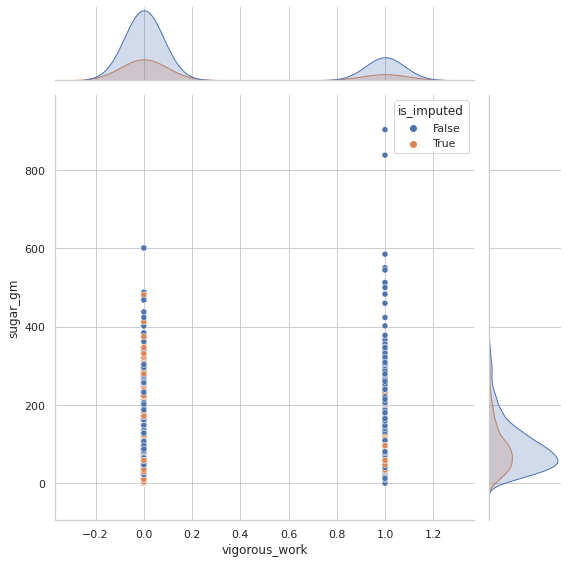

In [42]:
(
    nhanes_transformed_df
    .select_columns("vigorous_work", "sugar_gm")
    .missing.bind_shadow_matrix2(True, False, suffix = "_imp")
    .assign(
        vigorous_work = lambda df: df.vigorous_work.fillna(method='ffill'),
        sugar_gm = lambda df: df.sugar_gm.fillna(method='ffill')
    )
    .missing.scatter_imputation_plot(
    x="vigorous_work", 
    y="sugar_gm",
    show_marginal = True,   # muestra la distribucion a los costado
    height = 8             # tamano del grafico
    )
)

In [55]:
print('''La grafica nos muestra que la distribucion de los valores imputados es similar a la de los valores
reales. Ademas vemos que no sobrepasa a la distribucion real lo cual indica que es una buena 
imputacion. 
Tambien nos dice que hay muchos valores faltantes en la categoria de 'no vigorous_work''')

La grafica nos muestra que la distribucion de los valores imputados es similar a la de los valores
reales. Ademas vemos que no sobrepasa a la distribucion real lo cual indica que es una buena 
imputacion. 
Tambien nos dice que hay muchos valores faltantes en la categoria de 'no vigorous_work


## Imputacion hacia atras

In [50]:
(
    nhanes_transformed_df
    .select_columns('vigorous_recreational', 'sugar_gm')
    .fillna(method='bfill')
)

,vigorous_recreational,sugar_gm
SEQN,,
93705.0,0.0,43.04
93706.0,0.0,163.76
93709.0,0.0,163.76
93711.0,1.0,163.76
93712.0,1.0,207.67
...,...,...
102948.0,1.0,87.58
102949.0,0.0,87.58
102953.0,0.0,87.58


#### visualizacion mediante un scatterplot

Llenado hacia atras


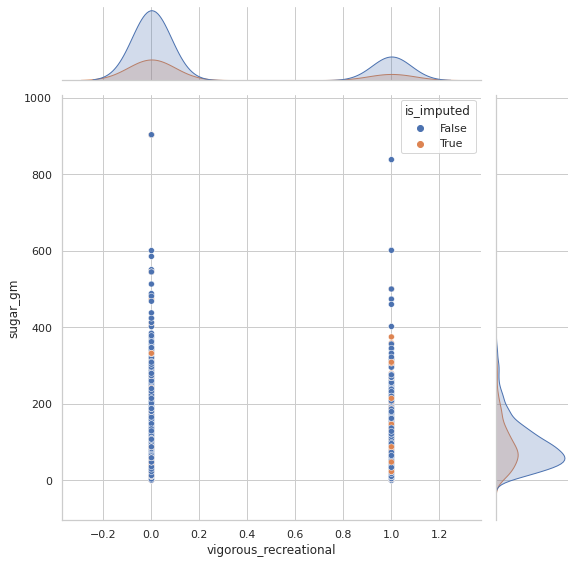

In [57]:
print('Llenado hacia atras')
(
    nhanes_transformed_df
    .select_columns("sugar_gm", "vigorous_recreational")
    .missing.bind_shadow_matrix2(True, False, suffix = "_imp")
    .assign(
        sugar_gm = lambda df: df.sugar_gm.fillna(method='bfill'),
        vigorous_recreational = lambda df: df.vigorous_recreational.fillna(method='bfill')
    )
    .missing.scatter_imputation_plot(
    y="sugar_gm", 
    x="vigorous_recreational",
    show_marginal = True,   # muestra la distribucion a los costado
    height = 8             # tamano del grafico
    )
);

In [58]:
print('''  En esta grafica vemos que la mayoria de los valores imputados pertenecen a la
categoria de vigorosidad recreativa. La distribucion de los valores imputados es similar a la 
de los valores completos por lo que conserva la estructura de los datos. Es una imputacion aceptable''')

  En esta grafica vemos que la mayoria de los valores imputados pertenecen a la
categoria de vigorosidad recreativa. La distribucion de los valores imputados es similar a la 
de los valores completos por lo que conserva la estructura de los datos. Es una imputacion aceptable
